In [1]:
############
# ITC 2020 DA 
# Tasks:
# 1. Tranformation
# 2. Exploratory Data Analysis

In [26]:
import pandas as pd
pd.set_option('display.precision',2)
import numpy as np

In [3]:
paving_df = pd.read_csv("pavingschedule.csv")

## 1. Transformation
clean NA, change data type

In [4]:
paving_df.head()

,id,street_id,activity,task_description,status,street,start_year,stop_date_actual,route_ahead,route_back
0,1924601586,17060,Mechanical Patching,Paved as part of 2016 City paving program.,Completed,BALDWICK RD,2016,2016-10-31,NOBLESTOWN RD,STEEN ST
1,1512981617,9881,Mechanical Patching,Paved as part of 2016 City paving program.,Completed,GLENBURY ST,2016,2016-10-31,KOHEN ST,SELDON ST
2,640675845,6563,Mechanical Patching,Paved as part of City 2016 paving program.,Completed,S BELLEFIELD AVE,2016,2016-10-01,FILMORE ST,FIFTH AVE
3,538119097,17748,Mechanical Patching,Paved as part of City 2016 paving program.,Completed,S BELLEFIELD AVE,2016,2016-10-01,FORBES AVE,FILMORE ST
4,726876041,17060,Base Repair,NaN,Completed,BALDWICK RD,2009,2009-06-05,NOBLESTOWN RD,STEEN ST


In [5]:
# basic info about df
display(paving_df.shape)
display(paving_df.info())

# No NA need be dropped

(8118, 10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8118 entries, 0 to 8117
Data columns (total 10 columns):
id                  8118 non-null int64
street_id           8118 non-null int64
activity            8118 non-null object
task_description    3976 non-null object
status              8118 non-null object
street              8118 non-null object
start_year          8118 non-null int64
stop_date_actual    7675 non-null object
route_ahead         8113 non-null object
route_back          8113 non-null object
dtypes: int64(3), object(7)
memory usage: 634.3+ KB


None

In [6]:
# convert "stop_data_actual" to datatime format

paving_df.stop_date_actual = pd.to_datetime(paving_df.stop_date_actual)
paving_df["stop_date_actual"].dtypes

dtype('<M8[ns]')

## 2. Exploratory Data Analysis

### 2.1 status

In [7]:
paving_df["status"].value_counts()

Completed    7631
Planned       444
Canceled       43
Name: status, dtype: int64

In [8]:
paving_df.groupby(["status","start_year"]).size().unstack(fill_value=0)

start_year,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
status,,,,,,,,,,,
Canceled,0,0,0,0,0,0,0,0,42,1,0
Completed,458,454,324,703,624,489,799,1279,881,846,774
Planned,0,0,0,0,0,0,0,0,11,268,165


In [9]:
paving_df["start_year"].value_counts()

2016    1279
2018    1115
2019     939
2017     934
2015     799
2012     703
2013     624
2014     489
2009     458
2010     454
2011     324
Name: start_year, dtype: int64

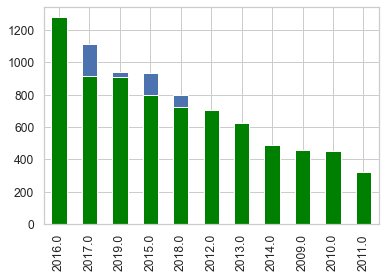

In [10]:
# paving project start 
paving_df["start_year"].value_counts().plot.bar();
# paving project end
paving_df["stop_date_actual"].dt.year.value_counts().plot.bar(color="green");

In [11]:
paving_df.groupby(["status",paving_df["stop_date_actual"].dt.year]).size().unstack(fill_value=0)

stop_date_actual,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0
status,,,,,,,,,,,
Canceled,0,0,0,0,0,0,0,0,40,3,0
Completed,458,454,324,703,624,489,799,1278,875,715,911
Planned,0,0,0,0,0,0,0,0,0,2,0


<span style="color:blue">
    2016 has the most paving actions started and completed, <br>
    2015-2019 have the most numbers of paving actions.<br>
    2018, 2019 have the most paving actions planned.</span>

## 2.2Activity

In [12]:
paving_df.activity.value_counts()

Mill and Overlay 3.5" (Secondary/Tertiary)    2745
Mill & Overlay 3 or More                      1974
Mill and Overlay 4" (Primary)                 1072
Base Repair                                    674
Super Pave                                     505
AC Overlay 3 or more                           437
Mill & Overlay - 2"                            372
Mechanical Patching                            162
AC Overlay - 2"                                 74
AC Overlay 3.5" (Secondary/Tertiary)            59
AC Overlay 4" (Primary)                         15
AC - AC Overlay > 2"                             9
PCC - Slab Replacement - Level 1                 8
Profile Milling                                  6
Mill and Overlay (Superpave)                     3
AC - AC Overlay < 2"                             2
AC Overlay (Superpave)                           1
Name: activity, dtype: int64

In [13]:
paving_df.activity.replace({"Mill & Overlay 3 or More":"Mill and Overlay",
                            "Mill and Overlay 4\" (Primary)":"Mill and Overlay",
                            "Mill and Overlay 3.5\" (Secondary/Tertiary)":"Mill and Overlay" ,
                            "Mill & Overlay - 2\"":"Mill and Overlay",
                            "Profile Milling":"Mill and Overlay",
                            "AC Overlay 3 or more": "AC Overlay",
                            "AC Overlay - 2\"":"AC Overlay",
                            "AC Overlay 3.5\" (Secondary/Tertiary)":"AC Overlay",
                            "AC Overlay 4\" (Primary)": "AC Overlay",
                            "AC - AC Overlay > 2\"":"AC Overlay",
                            "AC - AC Overlay < 2\"":"AC Overlay",
                            "Mechanical Patching": "Base Repair",
                            "Mill and Overlay (Superpave)":"Superpave",
                            "Super Pave":"Superpave",
                            "AC Overlay (Superpave)":"Superpave",
                            "PCC - Slab Replacement - Level 1": "Superpave"},inplace=True)
paving_df.activity.value_counts()                           

Mill and Overlay    6169
Base Repair          836
AC Overlay           596
Superpave            517
Name: activity, dtype: int64

<span style="color:green">
Combined: <br>
    All Mill and Overlay and AC Overlay with different inches<br>
Merged: <br>
    Profile Milling into Mill and Overlay <br>
    AC Overlay (Superpave) into Superpave <br>
    Mill and Overlay (Superpave) into Superpave
</span>

## 2.3 Activity description
task_description

In [17]:
# paving_df.task_description.unique()
# need to be cleaned

In [19]:
# extract year from task_description

paving_df["program_year"] = paving_df["task_description"].str.extract("(\d+)")
paving_df.program_year.value_counts()

2018    970
2019    919
2017    739
2016    419
2         5
10        4
Name: program_year, dtype: int64

In [ ]:
display(paving_df.loc[paving_df.program_year=="2"])

In [27]:
paving_df.replace({"2":"2016","10":np.nan}, inplace=True)
paving_df.program_year.value_counts()

2018    970
2019    919
2017    739
2016    424
Name: program_year, dtype: int64

In [28]:
#paving_df.task_description.value_counts()

In [29]:
paving_df.to_csv("paving_cleaned.csv")